In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sn
import sklearn.metrics as met

df = pd.read_csv('train.csv')
print(df.describe())
#print(df.head())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [75]:
survived_female = len(df.loc[(df['Sex']=='female')&(df['Survived']==1)])
survived_male = len(df.loc[(df['Sex']=='male')&(df['Survived']==1)])
died_female = len(df.loc[(df['Sex']=='female')&(df['Survived']==0)])
died_male = len(df.loc[(df['Sex']=='male')&(df['Survived']==0)])

fig = go.Figure()
fig.add_trace(go.Bar(x=['male','female'],y=[survived_male,survived_female],showlegend=True,name='survived'))
fig.add_trace(go.Bar(x=['male','female'],y=[died_male,died_female],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Male and female survivors"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


In [26]:
fig2 = go.Figure()

fig2.add_trace(go.Violin(y=df['Age'],box_visible=True))
fig2.update_traces(marker=dict(size=12,line=dict(width=1,color='DarkSlateGrey',)),hoverinfo="x+y")
fig2.update_layout(hovermode="closest", height=600, width=850, template='none',

    title = {'text': ""}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},colorway=['#006699',"#c17607",]
)
fig2.update_yaxes(title_text = "Age", title_font = {"size": 20,'color':'black'})
fig2.show()

In [179]:
fig3 = go.Figure()

fig3.add_trace(go.Histogram(x=df['Age'],histnorm='probability',nbinsx=20))
fig3.update_layout(hovermode="closest", height=600, width=850, template='none',
    title = {'text': ""}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},colorway=['#006699',"#c17607",],
    bargap=0.1
)
fig3.update_xaxes(title_text = "Age", title_font = {"size": 20,'color':'black'})
fig3.update_yaxes(title_text = "Probability", title_font = {"size": 20,'color':'black'})


In [180]:
fig4 = go.Figure()

fig4.add_trace(go.Histogram(x=df['Fare'],histnorm='probability',nbinsx=100))
fig4.update_layout(hovermode="closest", height=600, width=850, template='none',
    title = {'text': ""}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},colorway=['#006699',"#c17607",],
        bargap=0.1

)
fig4.update_xaxes(title_text = "Fare", title_font = {"size": 20,'color':'black'})
fig4.update_yaxes(title_text = "Probability", title_font = {"size": 20,'color':'black'})


In [182]:
fig4 = go.Figure()

fig4.add_trace(go.Histogram(x=df['Pclass'],nbinsx=3))
fig4.update_layout(hovermode="closest", height=600, width=850, template='none',
    title = {'text': ""}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},colorway=['#006699',"#c17607",],
        bargap=0.1

)
fig4.update_xaxes(title_text = "Pclass", title_font = {"size": 20,'color':'black'})
fig4.update_yaxes(title_text = "Number of people", title_font = {"size": 20,'color':'black'})


In [46]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Upper','Middle','Lower'],y=[
    len(df.loc[(df['Pclass']==1)&(df['Survived']==1)]),
    len(df.loc[(df['Pclass']==2)&(df['Survived']==1)]),
    len(df.loc[(df['Pclass']==3)&(df['Survived']==1)])
    ],showlegend=True,name='survived'))
fig.add_trace(go.Bar(x=['Upper','Middle','Lower'],y=[
    len(df.loc[(df['Pclass']==1)&(df['Survived']==0)]),
    len(df.loc[(df['Pclass']==2)&(df['Survived']==0)]),
    len(df.loc[(df['Pclass']==3)&(df['Survived']==0)])
    ],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Survivors by SES"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Southampton','Cherbourg','Queenstown'],y=[
    len(df.loc[(df['Embarked']=='S')&(df['Survived']==1)]),
    len(df.loc[(df['Embarked']=='C')&(df['Survived']==1)]),
    len(df.loc[(df['Embarked']=='Q')&(df['Survived']==1)])
    ],showlegend=True,name='survived'))
fig.add_trace(go.Bar(x=['Southampton','Cherbourg','Queenstown'],y=[
    len(df.loc[(df['Embarked']=='S')&(df['Survived']==0)]),
    len(df.loc[(df['Embarked']=='C')&(df['Survived']==0)]),
    len(df.loc[(df['Embarked']=='Q')&(df['Survived']==0)])
    ],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Survivors by port of embarkation"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(7)),y=[
    len(df.loc[(df['Parch']==i)&(df['Survived']==1)]) for i in range(7)
    ],showlegend=True,name='survived'))

fig.add_trace(go.Bar(x=list(range(7)),y=[
    len(df.loc[(df['Parch']==i)&(df['Survived']==0)]) for i in range(7)
    ],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Survivors by parch number"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


In [68]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(7)),y=[
    len(df.loc[(df['SibSp']==i)&(df['Survived']==1)]) for i in range(6)
    ],showlegend=True,name='survived'))

fig.add_trace(go.Bar(x=list(range(7)),y=[
    len(df.loc[(df['SibSp']==i)&(df['Survived']==0)]) for i in range(6)
    ],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Survivors by SibSp number"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


In [74]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(5,90,5)),y=[
    len(df.loc[(df['Age']>=i-5)&(df['Age']<i)&(df['Survived']==1)]) for i in range(5,90,5)
    ],showlegend=True,name='survived'))

fig.add_trace(go.Bar(x=list(range(5,90,5)),y=[
    len(df.loc[(df['Age']>=i-5)&(df['Age']<i)&(df['Survived']==0)]) for i in range(5,90,5)
    ],showlegend=True,name='died'))
fig.update_traces(hoverinfo="y")
fig.update_layout(hovermode="x", height=600, width=850, template='plotly_white',
    title = {'text': "Survivors histogram by age (5y bins)"}, titlefont={"size": 25,'color':'black'},
    yaxis={'tickfont':{"size": 15}},xaxis={'tickfont':{"size": 15}},
)
fig.show()


           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642    0.352413   29.699118    0.523008    0.381594   32.204208   
std      0.836071    0.477990   13.002015    1.102743    0.806057   49.693429   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   22.000000    0.000000    0.000000    7.910400   
50%      3.000000    0.000000   29.699118    0.000000    0.000000   14.454200   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.000000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  891.000000  891.000000  
mean     0.463524    0.383838  
std      0.791503    0.486592  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      2.000

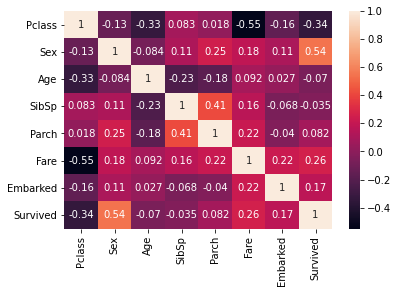

In [184]:
# final data
df = pd.read_csv('train.csv')
X_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df2 = df[X_names+['Survived']].copy()
from sklearn import tree

df2.replace('male',0,inplace=True)
df2.replace('female',1,inplace=True)
df2.replace('S',0,inplace=True)
df2.replace('Q',1,inplace=True)
df2.replace('C',2,inplace=True)


df2['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Embarked'].fillna(0, inplace=True)
print(df2.describe())
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True,)
plt.show()




In [185]:
X = df2[X_names]
Y = df2['Survived']
def print_predictions(true,pred):
    print(f'    Accuracy: {met.accuracy_score(true,pred)}')
    print(f'    Balanced accuracy: {met.balanced_accuracy_score(true,pred)}')
    print(f'    F-measure: {met.f1_score(true,pred)}')
    print(f'    Presicion: {met.precision_score(true,pred)}')
    print(f'    Receiver Operating Characteristic Curve: {met.roc_auc_score(true,pred)}')

models = []
# default
print('--------------------------------------')
print('     Default settings')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
models.append(clf)
predictions = list(clf.predict(X))
print_predictions(list(Y),predictions)
# max depth = 2
print('--------------------------------------')
print('     Max depth = 2')
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, Y)
models.append(clf)
predictions = list(clf.predict(X))
print_predictions(list(Y),predictions)
# max depth = 5
print('--------------------------------------')
print('     Max depth = 5')
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)
models.append(clf)
predictions = list(clf.predict(X))
print_predictions(list(Y),predictions)
# max depth = 10
print('--------------------------------------')
print('     Max depth = 10')
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, Y)
models.append(clf)
predictions = list(clf.predict(X))
print_predictions(list(Y),predictions)


--------------------------------------
     Default settings
    Accuracy: 0.9820426487093153
    Balanced accuracy: 0.9777106701179177
    F-measure: 0.976190476190476
    Presicion: 0.9939393939393939
    Receiver Operating Characteristic Curve: 0.9777106701179178
--------------------------------------
     Max depth = 2
    Accuracy: 0.7957351290684624
    Balanced accuracy: 0.7432892340139967
    F-measure: 0.6604477611940299
    Presicion: 0.9123711340206185
    Receiver Operating Characteristic Curve: 0.7432892340139968
--------------------------------------
     Max depth = 5
    Accuracy: 0.8417508417508418
    Balanced accuracy: 0.8219729651998849
    F-measure: 0.7813953488372092
    Presicion: 0.8316831683168316
    Receiver Operating Characteristic Curve: 0.821972965199885
--------------------------------------
     Max depth = 10
    Accuracy: 0.9248035914702581
    Balanced accuracy: 0.9092129230179273
    F-measure: 0.895800933125972
    Presicion: 0.9568106312292359
   

In [160]:
import graphviz 
#tree.plot_tree(models[0])
#tree.plot_tree(models[1])
#tree.plot_tree(models[2])
#tree.plot_tree(models[3])

dot_data = tree.export_graphviz(models[3], out_file='graphviz.txt', feature_names=X_names, class_names=['Died','Survived'], filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data) 




In [186]:
# Random forest
from sklearn.ensemble import RandomForestClassifier as rfc
# 500 estimators
print('--------------------------------------')
print('     Default settings')
clf = rfc(n_estimators=1000)
clf = clf.fit(X, Y)
models.append(clf)
predictions = list(clf.predict(X))
print_predictions(list(Y),predictions)


--------------------------------------
     Default settings
    Accuracy: 0.9820426487093153
    Balanced accuracy: 0.9793643945930399
    F-measure: 0.976401179941003
    Presicion: 0.9851190476190477
    Receiver Operating Characteristic Curve: 0.9793643945930399


In [187]:
# KNN
from sklearn.neighbors import KNeighborsClassifier as knn
ns = [2,3,5,10,25,50,70]
for i in ns:
    print('--------------------------------------')
    print(f'     {i}-NN')
    clf = knn(n_neighbors=i)
    clf = clf.fit(X, Y)
    predictions = list(clf.predict(X))
    print_predictions(list(Y),predictions)


--------------------------------------
     2-NN
    Accuracy: 0.8406285072951739
    Balanced accuracy: 0.7935001438021283
    F-measure: 0.73992673992674
    Presicion: 0.9901960784313726
    Receiver Operating Characteristic Curve: 0.7935001438021283
--------------------------------------
     3-NN
    Accuracy: 0.8361391694725028
    Balanced accuracy: 0.8201754385964912
    F-measure: 0.7787878787878788
    Presicion: 0.8081761006289309
    Receiver Operating Characteristic Curve: 0.8201754385964912
--------------------------------------
     5-NN
    Accuracy: 0.8092031425364759
    Balanced accuracy: 0.7867414437733677
    F-measure: 0.735202492211838
    Presicion: 0.7866666666666666
    Receiver Operating Characteristic Curve: 0.7867414437733679
--------------------------------------
     10-NN
    Accuracy: 0.7665544332210998
    Balanced accuracy: 0.7317371297095197
    F-measure: 0.6567656765676567
    Presicion: 0.7537878787878788
    Receiver Operating Characteristic Curv

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X, Y)
print(grid.best_params_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [191]:
predictions = grid.predict(X)
print_predictions(list(Y),predictions)


    Accuracy: 0.8597081930415263
    Balanced accuracy: 0.8508771929824561
    F-measure: 0.8164464023494861
    Presicion: 0.8200589970501475
    Receiver Operating Characteristic Curve: 0.8508771929824561
